# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as ttsplit
from sklearn.linear_model import LinearRegression as lr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif_func

import boston_valuation as val

%matplotlib inline


# Gather Data

[Link na data](http://lib.stat.cmu.edu/datasets/boston)

[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf)

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

raw_df

0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN  
4     17.8  
...    ...  
1007   NaN  
1008  21.0  
1009   NaN  
1010  21.0  
1011   NaN  

[1012 rows x 11 columns]

In [3]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(target)
df_data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
                                      'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT'])

df_data


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [4]:
dir (df_data)

['AGE',
 'B',
 'CHAS',
 'CRIM',
 'DIS',
 'INDUS',
 'LSTAT',
 'NOX',
 'PTRATIO',
 'RAD',
 'RM',
 'T',
 'TAX',
 'ZN',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__

### Data points and Features

In [5]:
# So Add column price (target)
df_data['PRICE'] = target

print(df_data.count())
df_data

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

## Cleaning Data - check for missing values

In [6]:
# Pandas has isnull()

pd.isnull(df_data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


 ## Visualising Data - Histograms, Distributions and Bar Charts

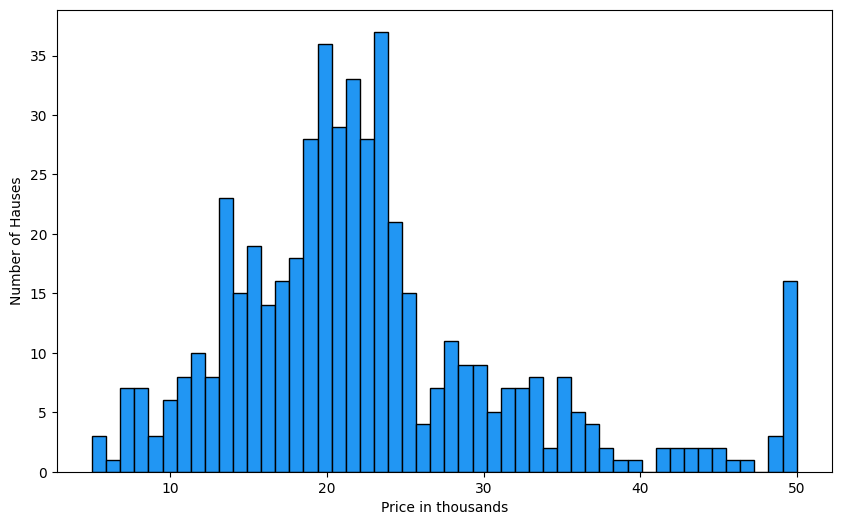

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df_data['PRICE'], bins=50, ec='black', color='#2196f3')

plt.xlabel('Price in thousands')
plt.ylabel('Number of Hauses')
plt.show()

<Figure size 2000x800 with 0 Axes>

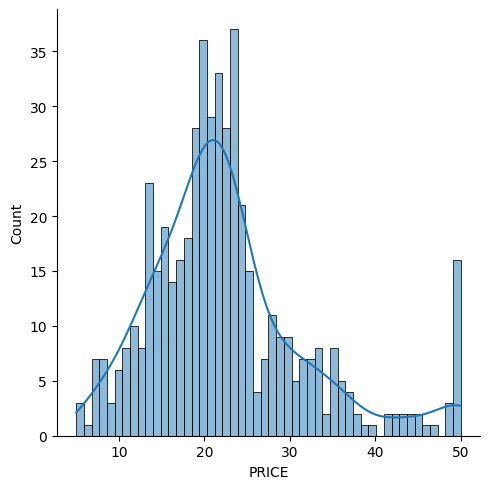

In [9]:
plt.figure(figsize = (20,8))
sns.displot(df_data['PRICE'], bins=50, kde=True)
plt.show()

<Figure size 2000x800 with 0 Axes>

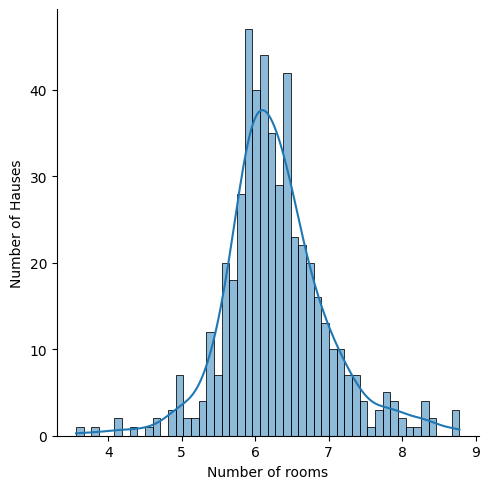

In [10]:
# Challenge: Visualise two other features of the dataset. Question: How many rooms the average property in Boston has

# Number of rooms
plt.figure(figsize = (20,8))
sns.displot(df_data['RM'], bins=50, kde=True)
plt.xlabel('Number of rooms')
plt.ylabel('Number of Hauses')
plt.show()

In [11]:
print('Priemerne má predaný dom ', df_data['RM'].mean(), ' rooms')

Priemerne má predaný dom  6.284634387351779  rooms


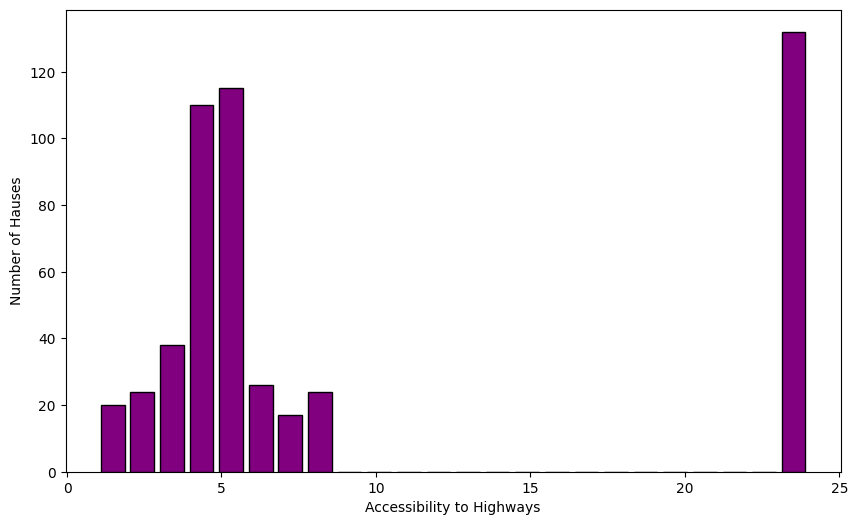

In [12]:
# Challenge: Create a meaningful histo for RAD using matplotlib ... in royal purple

plt.figure(figsize=(10,6))
plt.hist(df_data['RAD'], bins=24, ec='black', color='purple', rwidth=0.8)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Hauses')
plt.show()






In [13]:
df_data['RAD'].value_counts()
# That means, RAD is index from 1 to 24 (from bad to best accessibility index)
# Tahts means, that histogram graph should show 24 bins, one for each index in order to realisticaly visualise distribution

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

In [14]:
frequency = df_data['RAD'].value_counts()
# type(frequency)
# frequency.index # - values for index values
frequency.axes[0] # - the same as above

Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64', name='RAD')

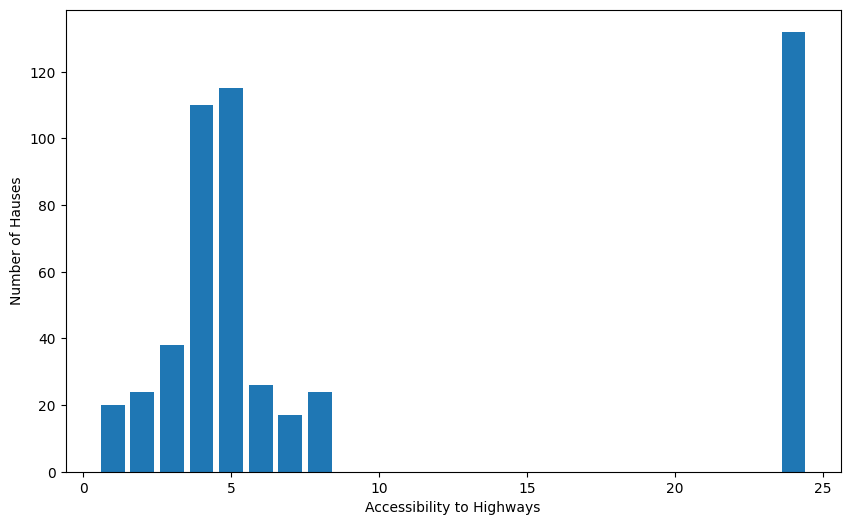

In [15]:
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Hauses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [16]:
# Kolko domov je na brehu rieky: 
df_data['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

## Descriptive statistics

In [17]:
df_data['PRICE'].min()

5.0

In [18]:
df_data['PRICE'].max()

50.0

In [19]:
df_data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [20]:
df_data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [21]:
df_data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [22]:
df_data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [23]:
df_data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation

## $$ \rho _{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$


In [24]:
df_data['PRICE'].corr(df_data['RM'])

0.6953599470715396

In [25]:
# Challenge : Calculate the correlation between property prices and the pupil teacher ratio

df_data['PRICE'].corr(df_data['PTRATIO'])



-0.5077866855375618

In [26]:
# Correlation všetkých premenných
df_data.corr()                # pearson correlation

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [27]:
# Chceme zrušiť duplicitné hodnoty
mask = np.zeros_like(df_data.corr())
print(mask)
triangle_indices = np.triu_indices_from(mask)

mask[triangle_indices] = True

print(mask)



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0

<function matplotlib.pyplot.show(close=None, block=None)>

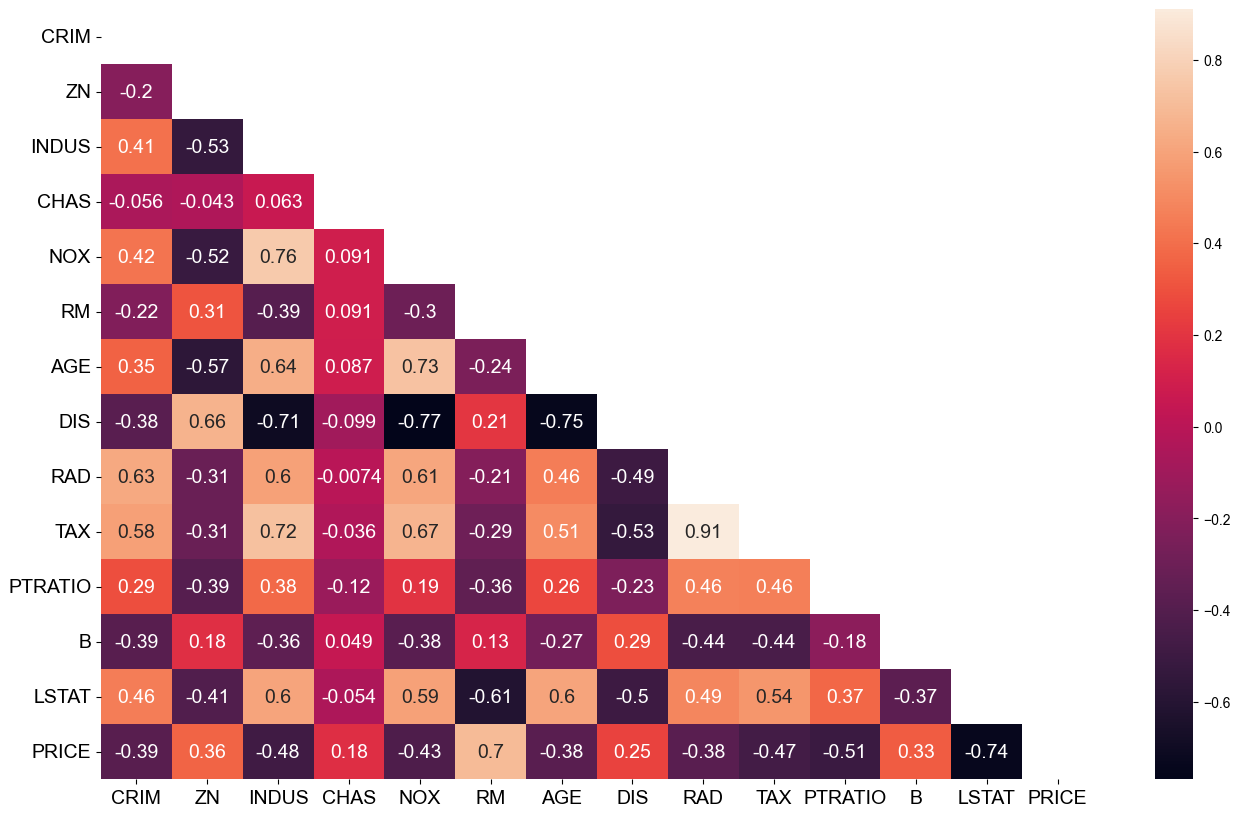

In [28]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(df_data.corr(), mask = mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.show

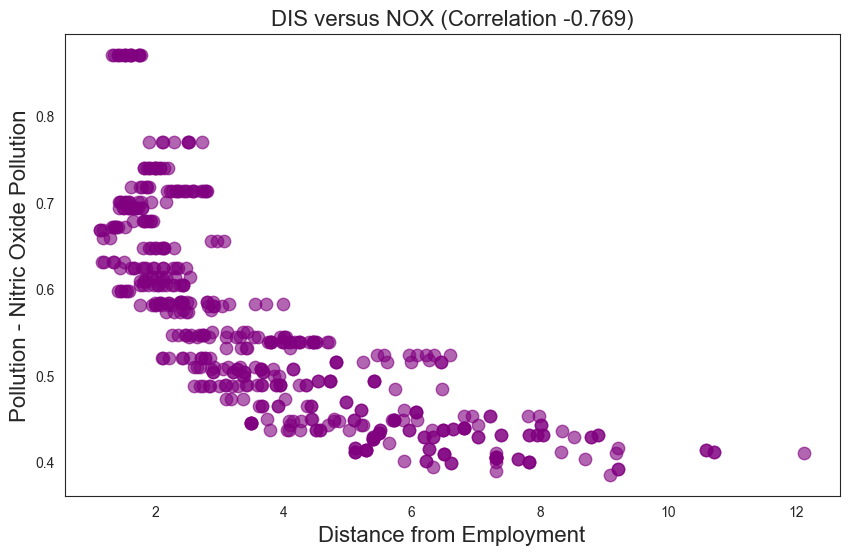

In [29]:
# Challenge: Picture the relationship between pollution and distance in your head
# Then create a scatter plot between DIS and NOX

nox_dis_corr = round(df_data['NOX'].corr(df_data['DIS']),3)

plt.figure(figsize=(10,6))
plt.scatter(x=df_data['DIS'], y=df_data['NOX'], color='purple', alpha=0.6, s=80)
plt.title(f'DIS versus NOX (Correlation {nox_dis_corr})', fontsize=16)
plt.xlabel('Distance from Employment', fontsize=16)
plt.ylabel('Pollution - Nitric Oxide Pollution', fontsize=16)
plt.show()

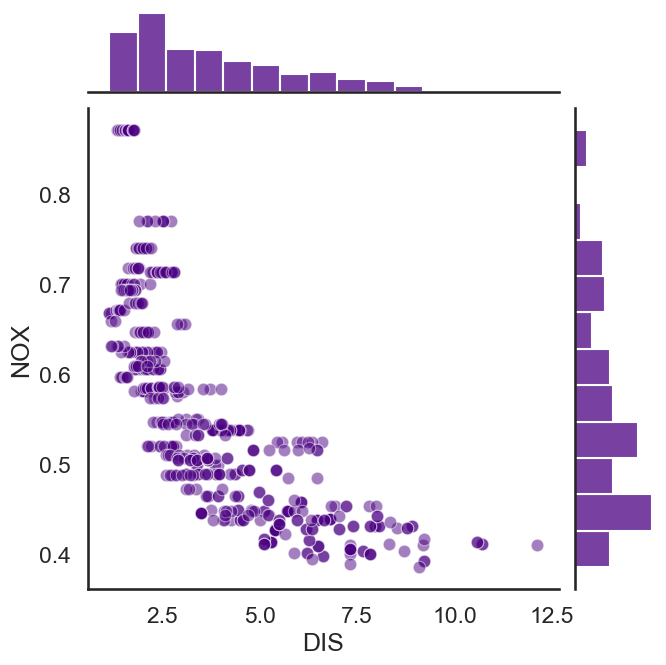

In [30]:
sns.set()
sns.set_context('talk')
sns.set_style('white')
sns.jointplot(x=df_data['DIS'], y=df_data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

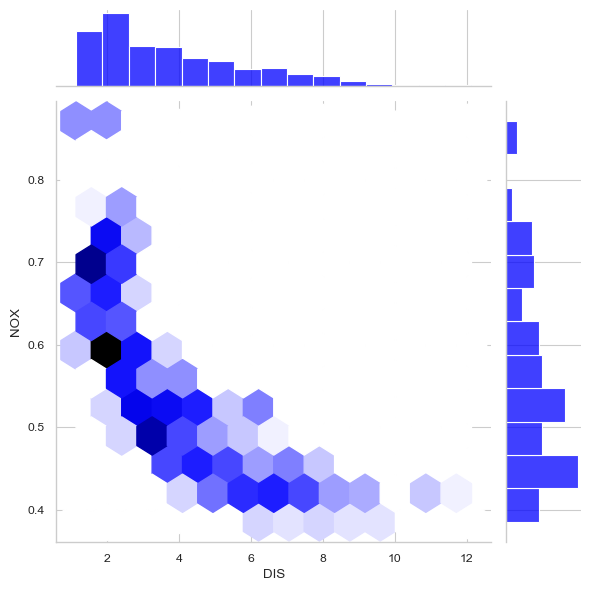

In [31]:
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid')
sns.jointplot(x=df_data['DIS'], y=df_data['NOX'], kind='hex', color='blue')
plt.show()

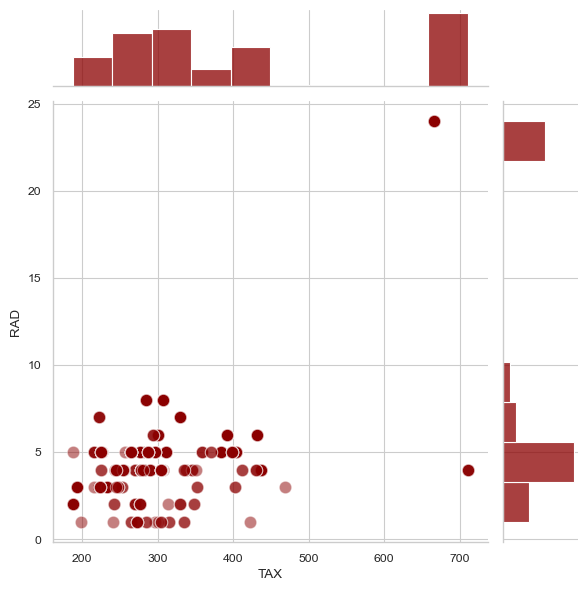

In [32]:
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid')
sns.jointplot(x=df_data['TAX'], y=df_data['RAD'], color='darkred', joint_kws={'alpha':0.5, 's':80})
plt.show()

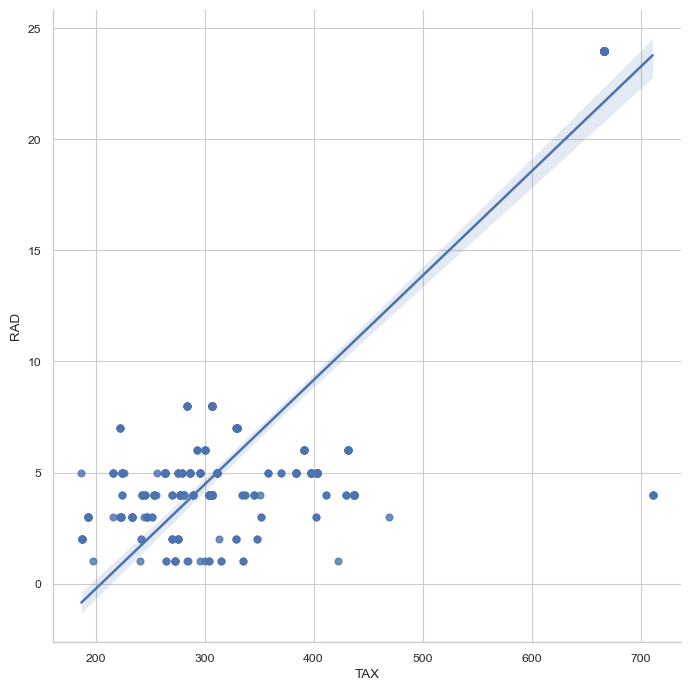

In [33]:
sns.lmplot(x='TAX', y='RAD', data=df_data, height=7)
plt.show()

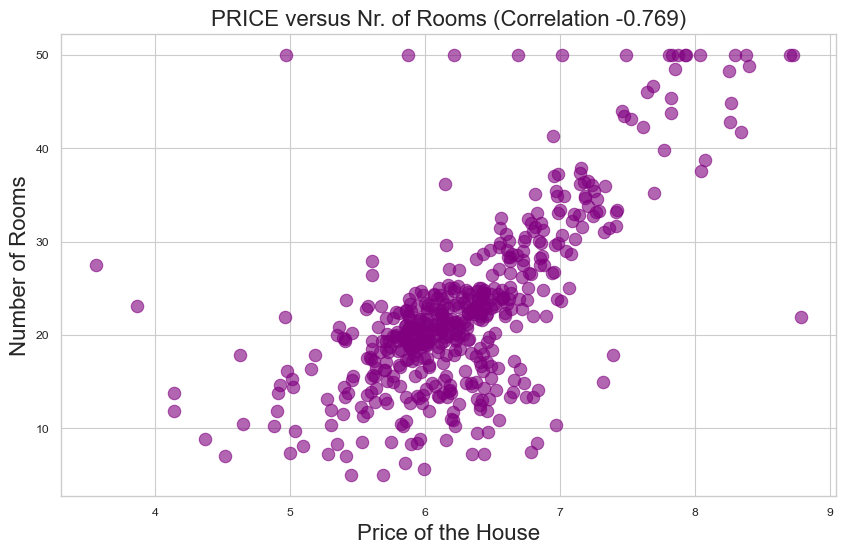

In [34]:
# Challenge: Create a scatter plot between the house prices and the number of rooms(RM)

prix_rm_corr = round(df_data['NOX'].corr(df_data['DIS']),3)

plt.figure(figsize=(10,6))
plt.scatter(x=df_data['RM'], y=df_data['PRICE'], color='purple', alpha=0.6, s=80)
plt.title(f'PRICE versus Nr. of Rooms (Correlation {prix_rm_corr})', fontsize=16)
plt.xlabel('Price of the House', fontsize=16)
plt.ylabel('Number of Rooms', fontsize=16)
plt.show()

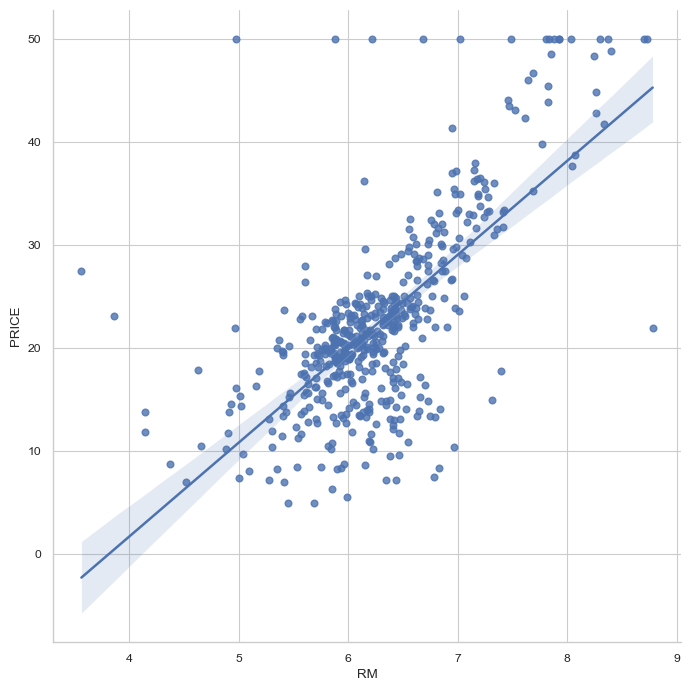

In [35]:
sns.lmplot(x='RM', y='PRICE', data=df_data, height=7)
plt.show()

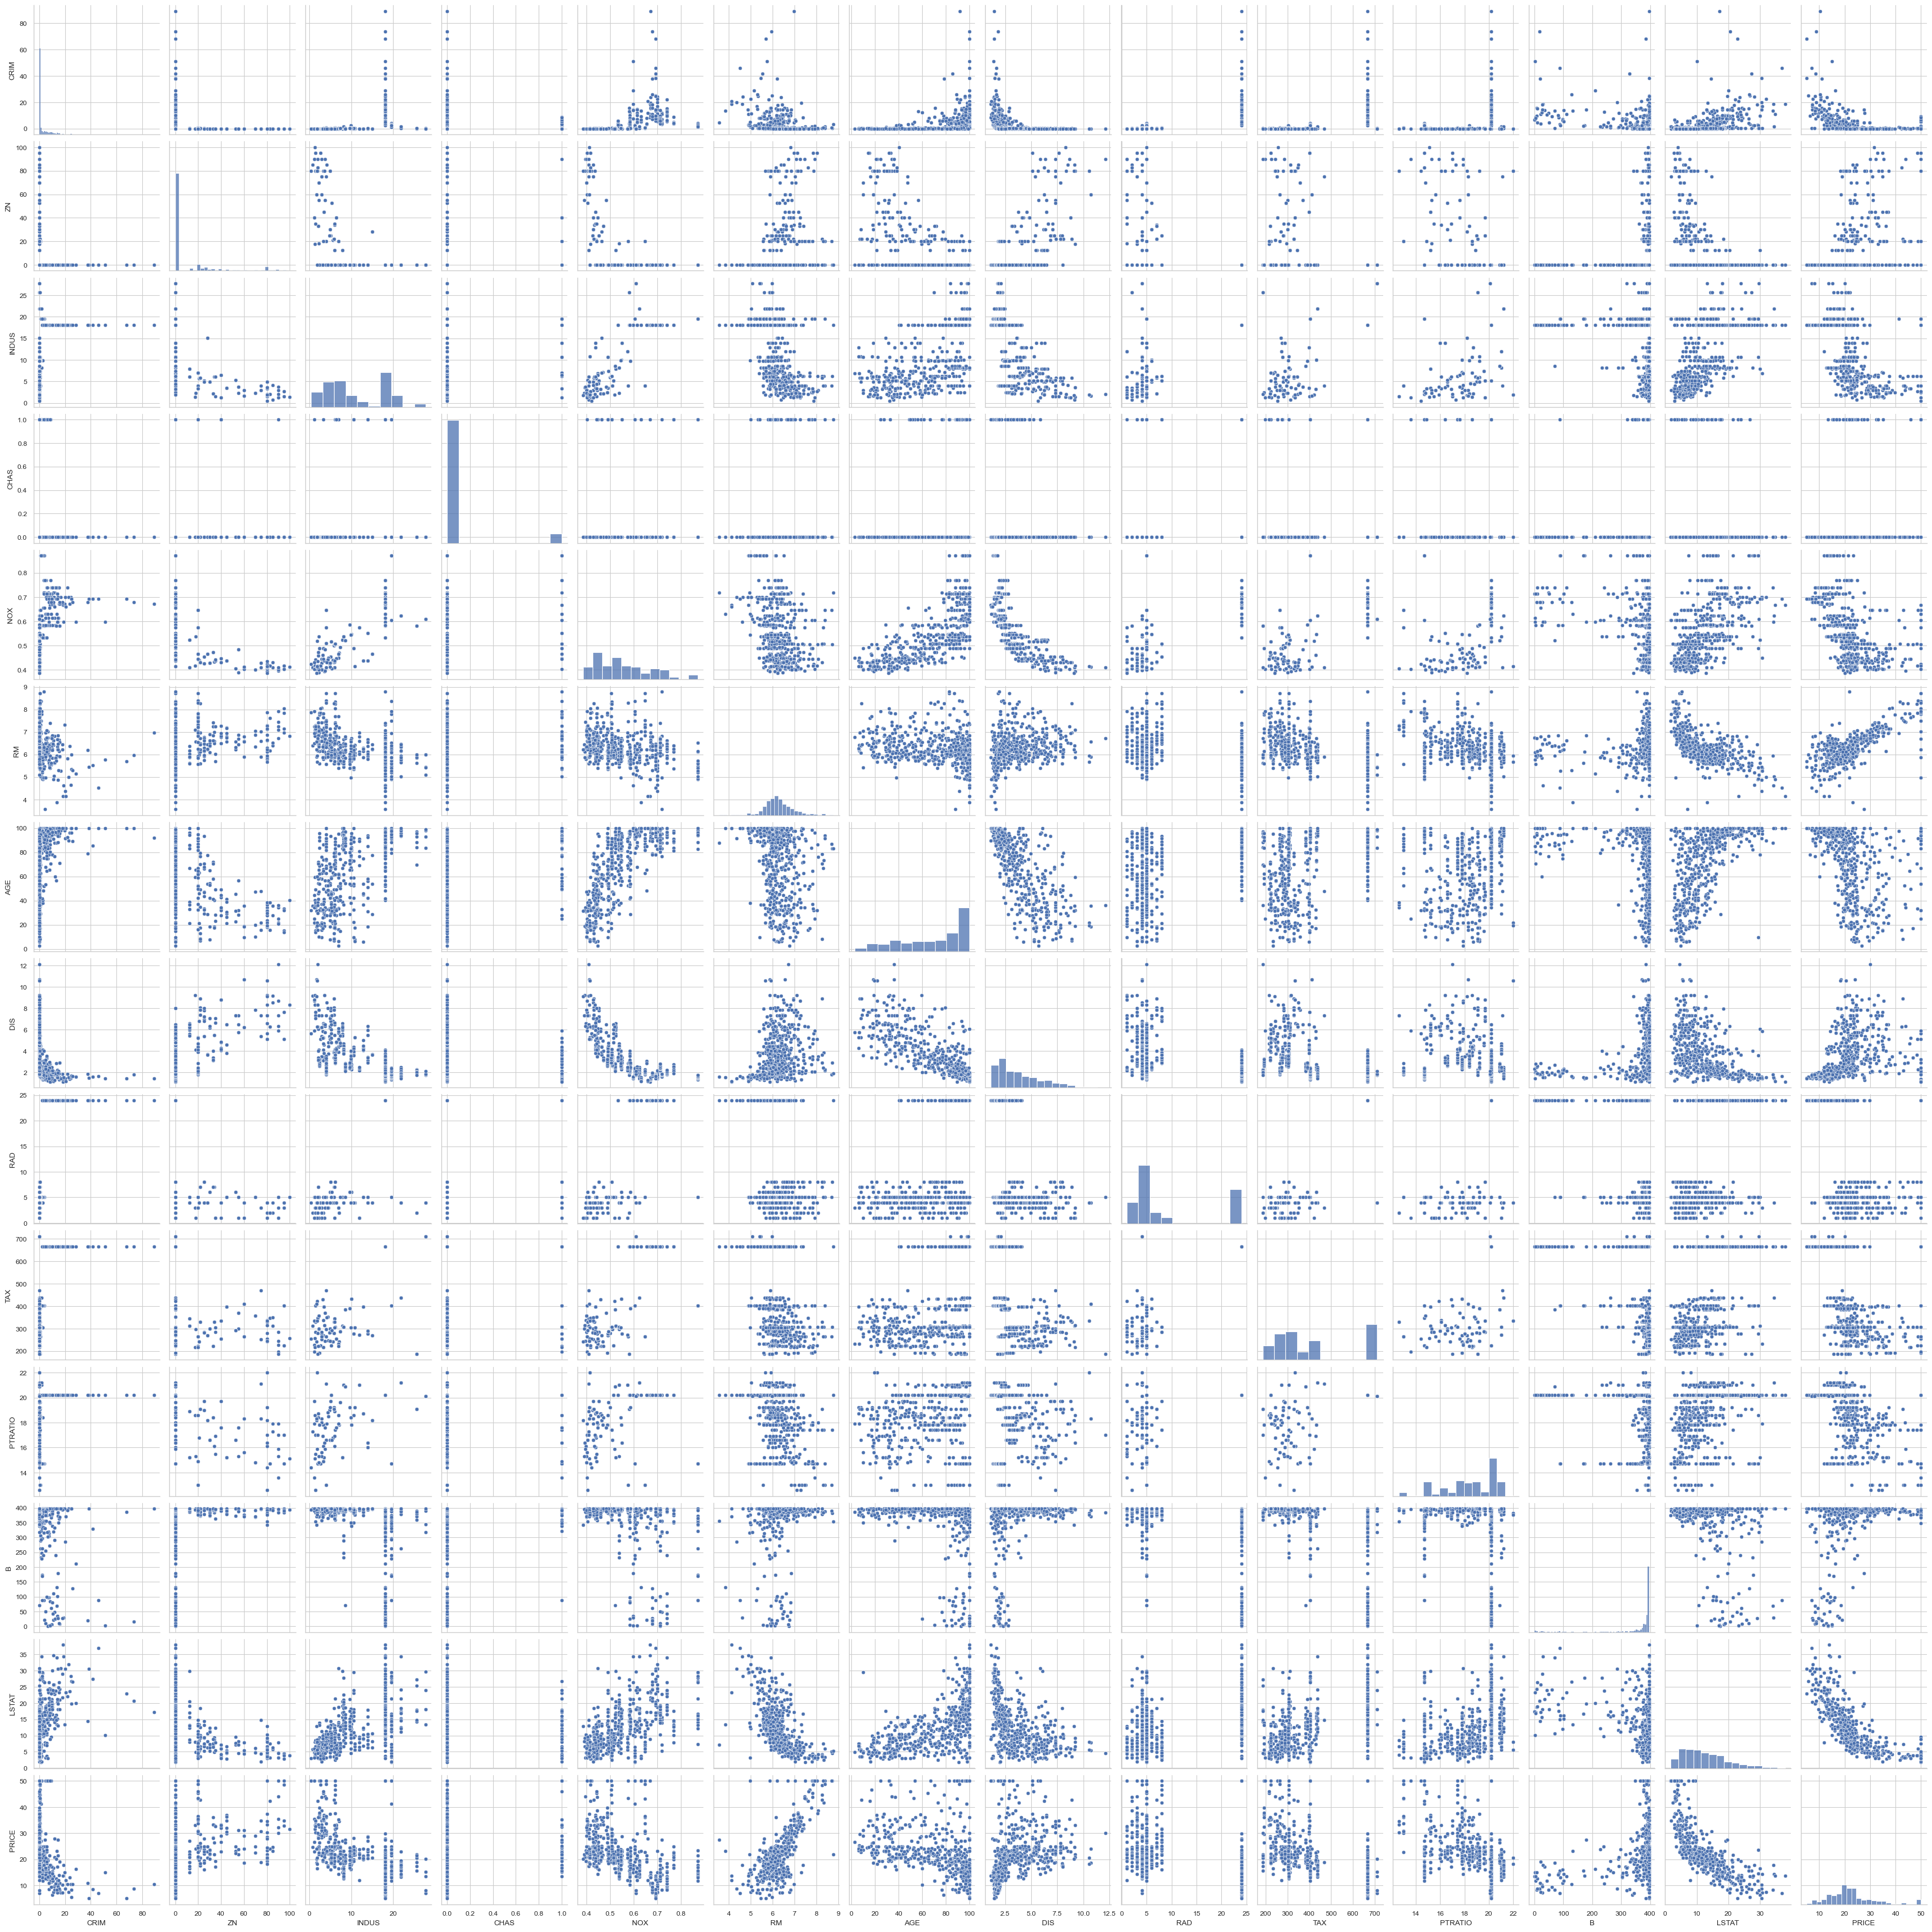

CPU times: total: 42.3 s
Wall time: 42.5 s


In [36]:
%%time

sns.pairplot(data=df_data)
plt.show()

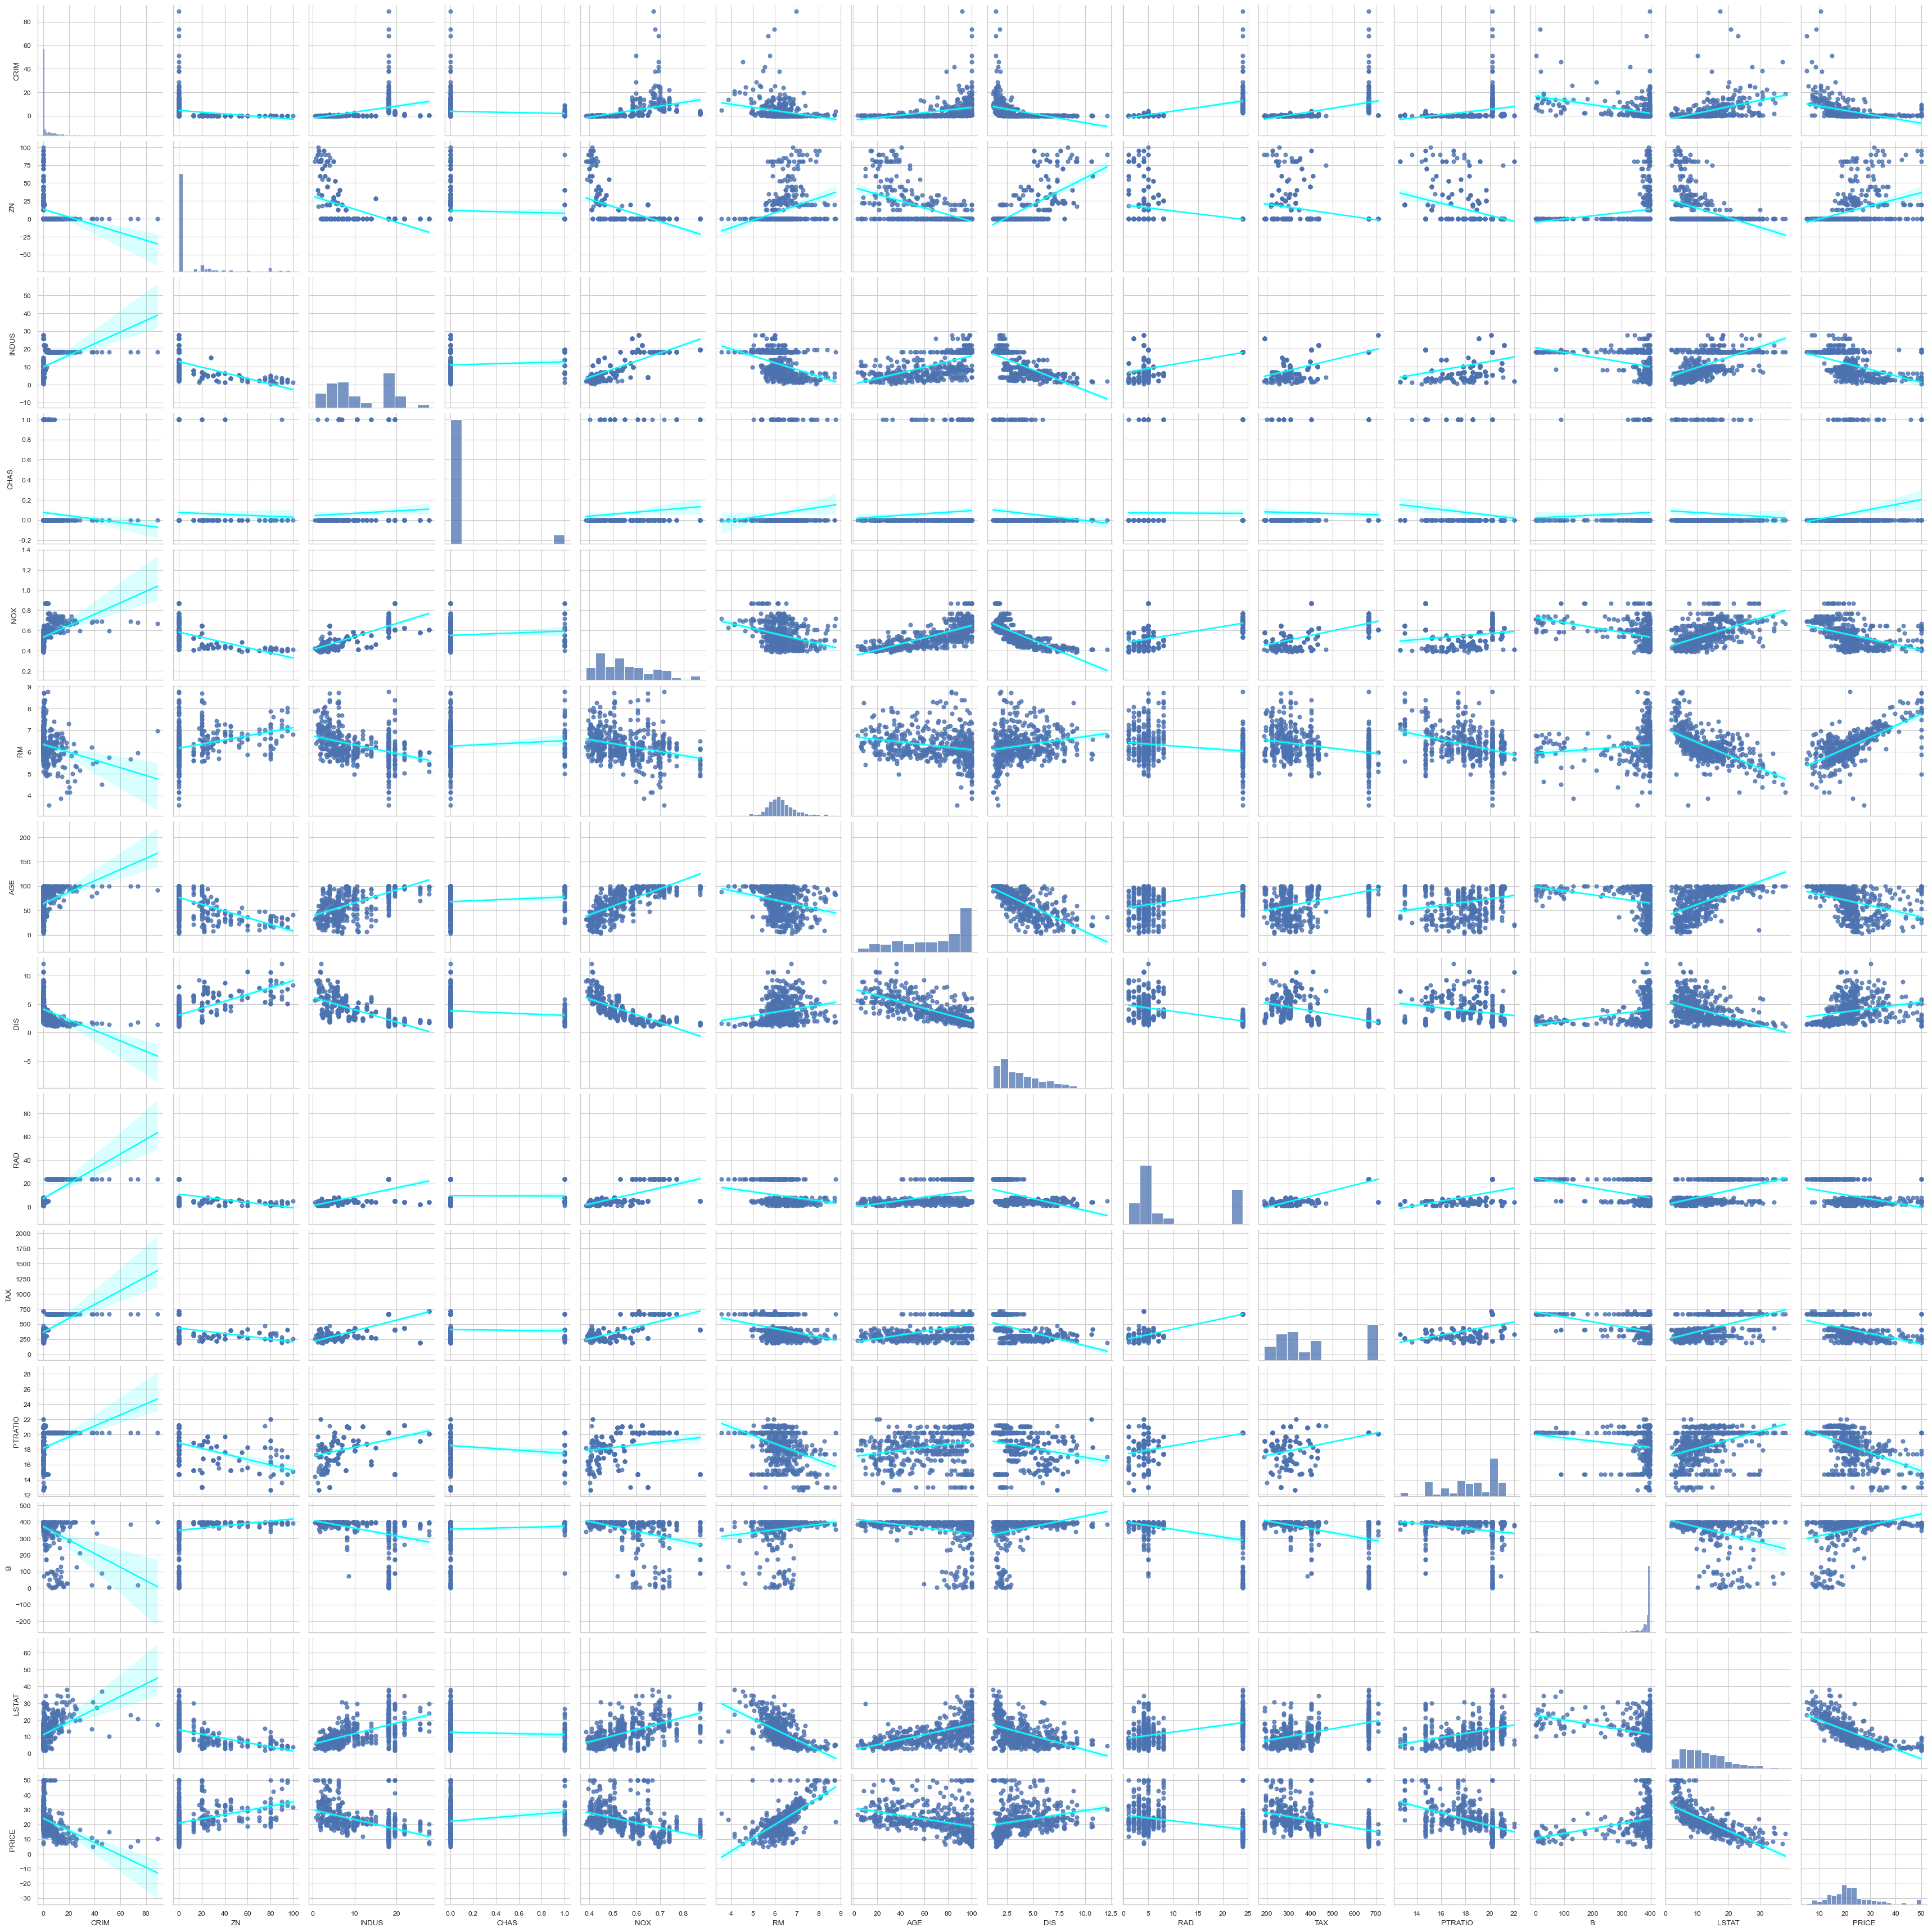

CPU times: total: 1min 1s
Wall time: 1min 1s


In [37]:
%%time
sns.pairplot(df_data, kind='reg', plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()

## Training and Test Dataset Split

In [38]:
prices = df_data['PRICE']
# Dataset bez stĺpca PRICE
features = df_data.drop('PRICE', axis=1)

# Rozdelíme dáta na učiace a testovacie v pomere 80:20 
X_train, X_test, y_train, y_test = ttsplit(features, prices,
                                           test_size=0.2, random_state=10)

# %  of training data set -> test_size 80% : 20%
len(X_train)/len(features)

0.7984189723320159

In [39]:
# %  of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

In [40]:
len(X_test)/len(features)

0.2015810276679842

## Multivariable Regression

In [41]:
regr = lr()
regr.fit(X_train, y_train)

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

# Výsledok multilineárnej regresie:
# PRICE = 36,6 + 3,1RM - 16,3NOX - 1,5DIS + 2CHAS + ..... - 0,6LSAT



Intercept:  36.5330513828241


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [42]:
# Challenge: print out r-squared for training and test datasets
print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))
# Test data budú mať R-Squared vždy horšie (menšie) pri testovacích dátach. Avšak 0,67 je stále vysoké R-Squared

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115628


## Data transformations

In [43]:
# 
df_data['PRICE'].skew()

1.1080984082549072

In [44]:
# Aplikovanie log transformácie na hodnoty df_data
y_log = np.log(df_data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [45]:
# Ako vyzerá skew log :
y_log.skew()

-0.33032129530987864

<function matplotlib.pyplot.show(close=None, block=None)>

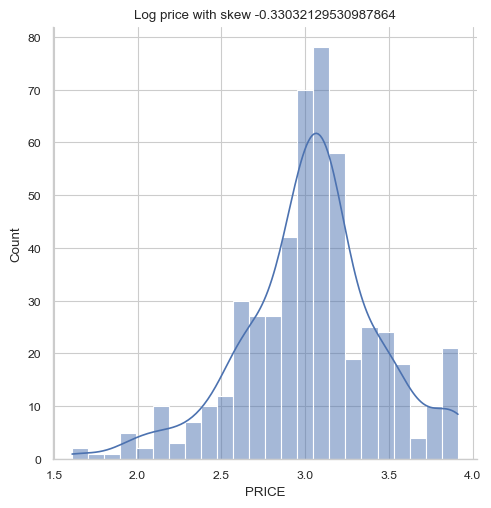

In [46]:
sns.displot(y_log, kde=True)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show

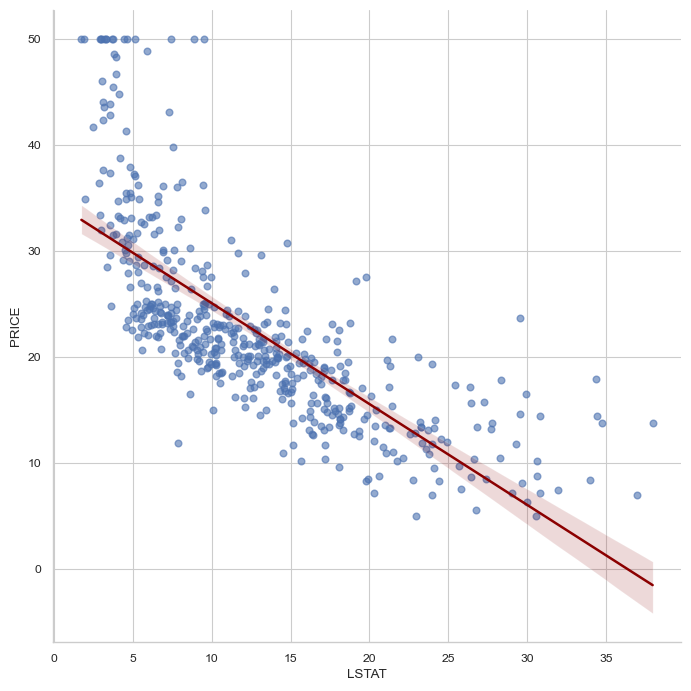

In [47]:
sns.lmplot(x='LSTAT', y='PRICE', data=df_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'darkred'})

plt.show()


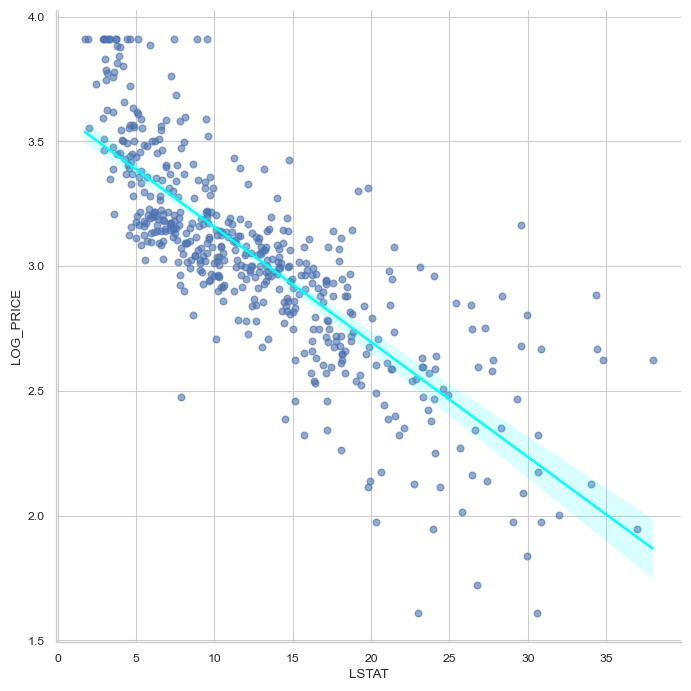

In [48]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log


sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, 
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'cyan'})

plt.show()

## Linearna regresia na logaritmických dátach

In [49]:
prices = np.log(df_data['PRICE']) # use of log prices
# Dataset bez stĺpca PRICE
features = df_data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = ttsplit(features, prices,
                                           test_size=0.2, random_state=10)

regr = lr()
regr.fit(X_train, y_train)

print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

# Výsledok multilineárnej regresie:
# PRICE = 36,6 + 3,1RM - 16,3NOX - 1,5DIS + 2CHAS + ..... - 0,6LSAT

Training data r-squared:  0.7930234826697584
Test data r-squared:  0.744692230626071
Intercept:  4.059943871775174


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [50]:
# Charles river Property premium
# Transformácia z logaritmickej regresie.....

np.e**0.080331

1.0836456950439142

 ## P-values & Evaluating Coefficients

In [51]:
X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Squares
# y_train - target values
# X_incl_const - features
# model - linear regression model
model = sm.OLS(y_train, X_incl_const)
# results - regression results
results = model.fit()

# results.params
# results.pvalues
pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity

### VIF for one of the features:

#### STEP 1: Linear regression je pustená na všetky hodnoty proti TAX


$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... \alpha _{12} LSTAT $$

#### STEP 2: Vypočítame VIF z r-squared regresie z predošlého kroku

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

#### STEP 3: Vypočítame VIF pre všetky features....


In [52]:
vif_func(exog=X_incl_const.values, exog_idx=1)
# exog_idx=1 = CRIM

1.7145250443932485

In [53]:
# Challenge: Print out the number of columns in X_incl_const

# len(X_incl_const.columns)
# X_incl_const.shape
# X_incl_const.shape[1]

X_incl_const

const      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...       ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
367  666.0     20.2  131.42  13.33  
34   307.0     21.0  248.31  20.34  
78   398.0     18.7  386.40  12.34  
172  296.0     16.6  396.90  14.69  
..     ...      ...     ...    ...  
320  287.0     19.6  396.90   7.20  
15   307.0     21.0  395.62   8.47  
484  666.0     20.2  370.73  13.34  
125  188.0     19.1  385.02  14.81  
265  264.0     13.0  392.40  10.45  

[404 rows x 14 columns]

In [54]:
# Challenge: Write a for loop that prints out all the VIFs for all features

# My solution:
for i in range(X_incl_const.shape[1]):
    print (f'VIF value for {X_incl_const.columns.values.tolist()[i]}', vif_func(exog=X_incl_const.values, exog_idx=i))


VIF value for const 597.5487126763895
VIF value for CRIM 1.7145250443932485
VIF value for ZN 2.3328224265597584
VIF value for INDUS 3.943448822674638
VIF value for CHAS 1.0788133385000576
VIF value for NOX 4.410320817897635
VIF value for RM 1.8404053075678575
VIF value for AGE 3.3267660823099408
VIF value for DIS 4.222923410477865
VIF value for RAD 7.314299817005065
VIF value for TAX 8.508856493040817
VIF value for PTRATIO 1.8399116326514058
VIF value for B 1.3386713255364715
VIF value for LSTAT 2.812544292793036


In [55]:
vif = []

for i in range(X_incl_const.shape[1]):
    vif.append(vif_func(exog=X_incl_const.values, exog_idx=i))

print(vif)


[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674638, 1.0788133385000576, 4.410320817897635, 1.8404053075678575, 3.3267660823099408, 4.222923410477865, 7.314299817005065, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


In [56]:
vif = [vif_func(exog=X_incl_const.values,
                exog_idx=i) for i in range(X_incl_const.shape[1])]

print(vif)
pd.DataFrame({'coef_name': X_incl_const.columns,
             'VIF': np.around(vif,2)})

# vif > 10 => problematic, so everything is OK from point of view VIF 

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674638, 1.0788133385000576, 4.410320817897635, 1.8404053075678575, 3.3267660823099408, 4.222923410477865, 7.314299817005065, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


coef_name     VIF
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification & the BIC (Bayes´ information criteria)

In [57]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

# OLS = Ordinary Least Squares
# y_train - target values
# X_incl_const - features
# model - linear regression model
model = sm.OLS(y_train, X_incl_const)
# results - regression results
results = model.fit()


org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is: ', results.bic)
print('R-squared is: ', results.rsquared)

BIC is:  -139.74997769478898
R-squared is:  0.7930234826697584


In [58]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

# OLS = Ordinary Least Squares
# y_train - target values
# X_incl_const - features
# model - linear regression model
model = sm.OLS(y_train, X_incl_const)
# results - regression results
results = model.fit()


coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is: ', results.bic)
print('R-squared is: ', results.rsquared)

BIC is:  -145.14508855591163
R-squared is:  0.7927126289415163


In [59]:
# Reduced model #2 excluding INDUS & AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

# OLS = Ordinary Least Squares
# y_train - target values
# X_incl_const - features
# model - linear regression model
model = sm.OLS(y_train, X_incl_const)
# results - regression results
results = model.fit()


reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print('BIC is: ', results.bic)
print('R-squared is: ', results.rsquared)

BIC is:  -149.49934294224656
R-squared is:  0.7918657661852815


In [60]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

# Tu vidíme, že odobratie feature nespôsobilo v koeficientoch žiadne dramatické zmeny =>nie je tam multicollinearity

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals & Residual Plots

### Modified model: transformed (using log prices) & simplified (dropping two features - INDUS & AGE)

In [68]:
# Modified model: transformed (using log prices) & simplified (dropping 2 features)
prices = np.log(df_data['PRICE']) # use of log prices
# Dataset bez stĺpca PRICE
features = df_data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = ttsplit(features, prices,
                                           test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals 
residuals = y_train - results.fittedvalues
print('Type of residuals is: ', type(residuals))
residuals.describe()
results.resid



Type of residuals is:  <class 'pandas.core.series.Series'>


50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

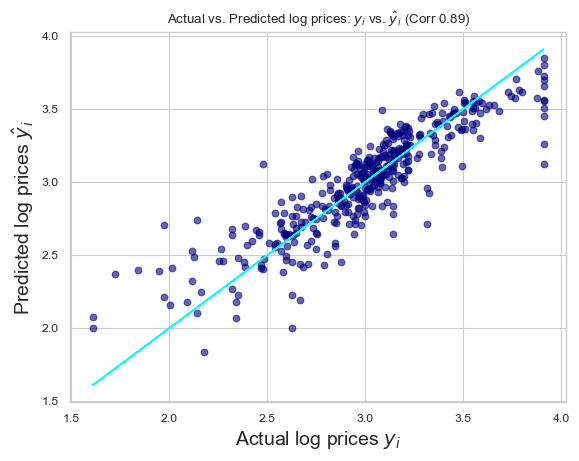

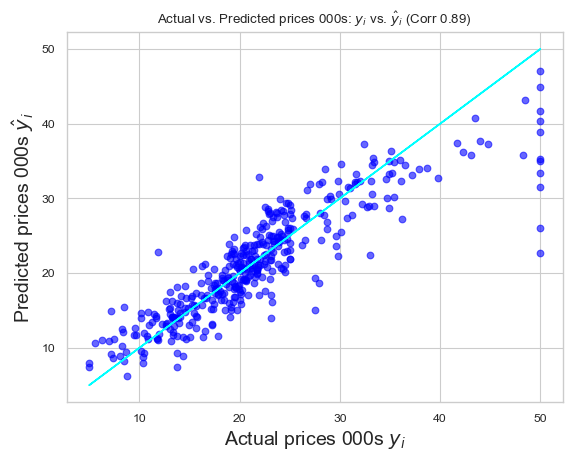

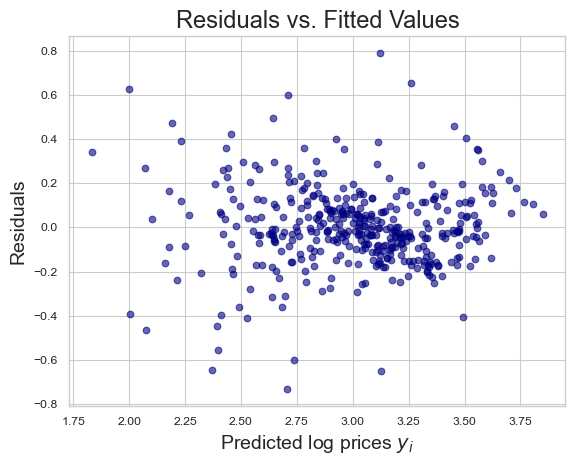

In [69]:
# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
# corr vyšla 0,89
plt.scatter(x=y_train, y=results.fittedvalues, color='navy', alpha=0.6)
plt.plot(y_train,y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted log prices: $y _i$ vs. $\hat y_i$ (Corr {corr})')

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, color='blue', alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices 000s: $y _i$ vs. $\hat y_i$ (Corr {corr})')

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, color='navy', alpha=0.6)

plt.xlabel('Predicted log prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs. Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

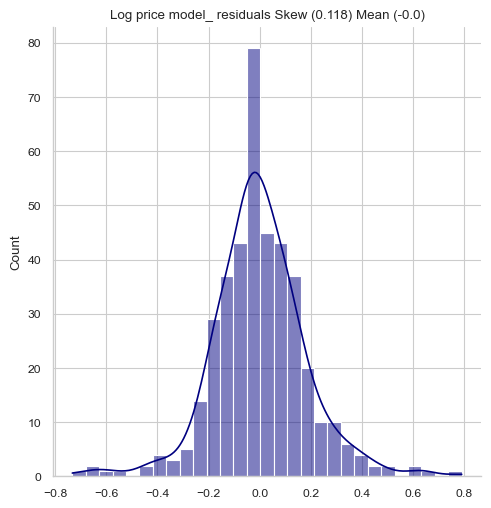

In [62]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='navy',  kde=True)
plt.title(f'Log price model_ residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [ ]:
# Challenge: Using the original model with all the features and normal prices generate:
# Plot of actual vs predicted prices (incl. correlation) using different color
# Plot residuals vs predicted prices
# Plot of distribution of residuals (incl. skew)
# Analyse results.

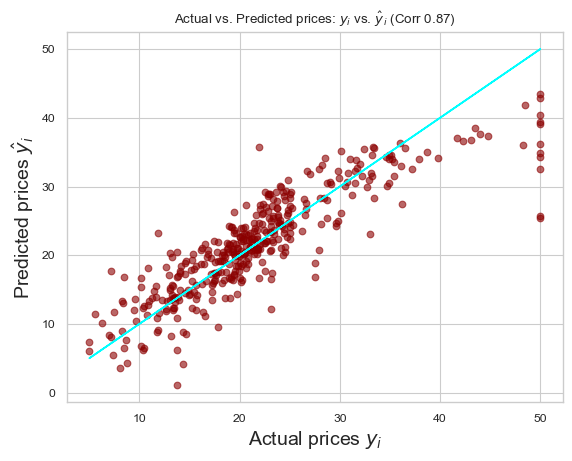

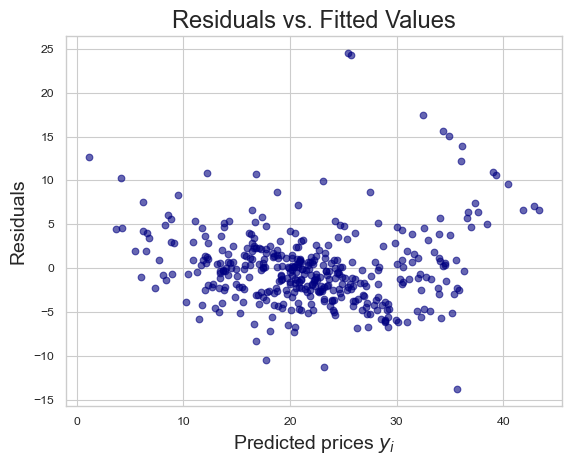

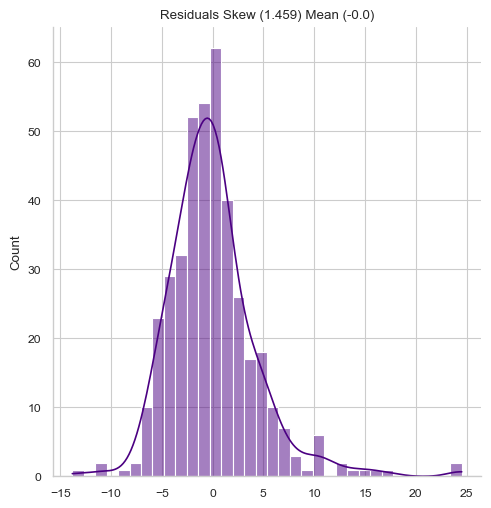

In [70]:
# Original model: normal prices & all features

prices = df_data['PRICE'] # not using of log prices

# Dataset bez stĺpca PRICE
features = df_data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = ttsplit(features, prices,
                                           test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, color='darkred', alpha=0.6)
plt.plot(y_train,y_train, color='cyan')

plt.xlabel('Actual prices $y _i$', fontsize=14)
plt.ylabel('Predicted prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices: $y _i$ vs. $\hat y_i$ (Corr {corr})')

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, color='navy', alpha=0.6)

plt.xlabel('Predicted prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs. Fitted Values', fontsize=17)

plt.show()

# Distribution of Residuals - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='indigo',  kde=True)
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

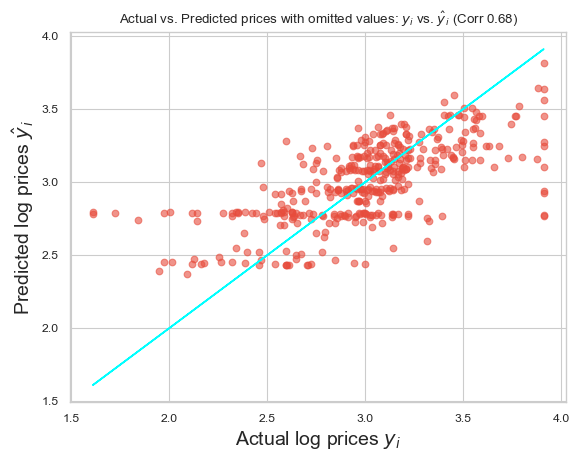

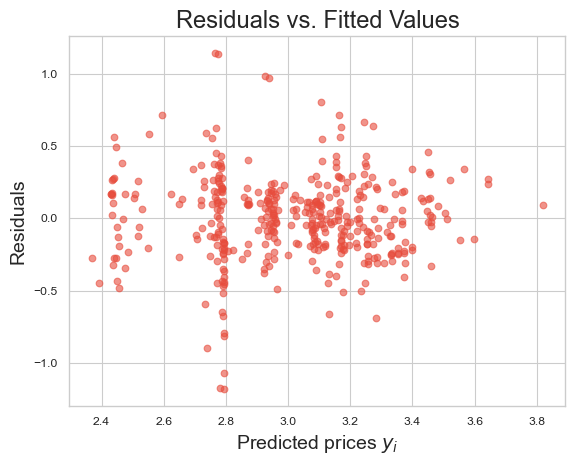

In [71]:
# Model ommiting key features using log prices

prices = np.log(df_data['PRICE']) # use of log prices

# Dataset bez stĺpca PRICE a klucových features
features = df_data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = ttsplit(features, prices,
                                           test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, color='#e74c3c', alpha=0.6)
plt.plot(y_train,y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs. Predicted prices with omitted values: $y _i$ vs. $\hat y_i$ (Corr {corr})')

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, color='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs. Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [65]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse],
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Log Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Log Model        0.460   0.090  0.300000

In [72]:
# Challenge: Our estimate for a house price is $30000. Calculate the upper and lower bound 
# for a 95 % predictioon interval using the reduced log model

pri = np.log(30)
std_dev = np.sqrt(reduced_log_mse)
print('1 standard deviation in log prices is : ', std_dev)
print('2 standard deviation in log prices is : ', 2*std_dev)

upper_bound = pri + 2*std_dev
lower_bound = pri - 2*std_dev

print ('Dolná hranica v log cenách pre 95 % rozsah je : ', lower_bound)
print ('Dolná hranica v normálnych cenách pre 95 % rozsah je : ', np.e**lower_bound*1000)
print ('Horná hranica v log cenách pre 95 % rozsah je : ', upper_bound)
print ('Horná hranica v normálnych cenách pre 95 % rozsah je : ', np.e**upper_bound*1000)

1 standard deviation in log prices is :  0.18708286933869708
2 standard deviation in log prices is :  0.37416573867739417
Dolná hranica v log cenách pre 95 % rozsah je :  3.0270316429847615
Dolná hranica v normálnych cenách pre 95 % rozsah je :  20635.886906824155
Horná hranica v log cenách pre 95 % rozsah je :  3.7753631203395495
Horná hranica v normálnych cenách pre 95 % rozsah je :  43613.34233239937


In [73]:
30000 + np.e**(2*np.sqrt(reduced_log_mse))*1000 # Wrong! Add first. Transform afterwards!

31453.778077746647

In [3]:
# Skuska modulu vo valuation tool.py
val.get_dollar_estimate(2, 30, True)

The estimated property value is 278000.0
AT 95% confidence the valuation range is
USD 191000.0 at the lower end to USD 404000.0 at the high end.


F:\GITHUB\2022 Datascience and ML Bootcamp\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
